# Training a network on the CIFAR10 dataset

We'll train a custom network on the cifar10 dataset. CIFAR10 is a dataset of images categorized into 10 categories. Goal of the network is to classify the images into the correct category.

Let's start with loading any libraries you need.

In [56]:
# Load libraries you need here
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

Load the data from the CIFAR10. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes.
Info can be found in the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [57]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train, X_test = X_train / 255, X_test / 255

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape


((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

Create your model using conv2D layers, some type of pooling and finish with a dense network.

In [58]:
model = Sequential()
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        padding="same",
        input_shape=(32, 32, 3),
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    )
)
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        padding="same",
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(
    Conv2D(
        filters=64,
        kernel_size=(5, 5),
        activation="relu",
        kernel_initializer="he_uniform",
        padding="same",
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    )
)
model.add(
    Conv2D(
        filters=64,
        kernel_size=(5, 5),
        activation="relu",
        kernel_initializer="he_uniform",
        padding="same",
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(
    Conv2D(
        filters=128,
        kernel_size=(7, 7),
        activation="relu",
        kernel_initializer="he_uniform",
        padding="same",
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    )
)
model.add(
    Conv2D(
        filters=128,
        kernel_size=(7, 7),
        activation="relu",
        kernel_initializer="he_uniform",
        padding="same",
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(10, activation="softmax"))


model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

Train your model. Since the dataset is so big not a lot of epochs should be needed to start seeing results.

In [59]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1250/1250 [==============================] - 87s 69ms/step - loss: 1.8744 - accuracy: 0.3854 - val_loss: 1.5062 - val_accuracy: 0.5175
Epoch 2/10
1250/1250 [==============================] - 84s 67ms/step - loss: 1.3509 - accuracy: 0.5635 - val_loss: 1.2001 - val_accuracy: 0.6201
Epoch 3/10
1250/1250 [==============================] - 80s 64ms/step - loss: 1.1632 - accuracy: 0.6436 - val_loss: 1.0882 - val_accuracy: 0.6761
Epoch 4/10
1250/1250 [==============================] - 79s 63ms/step - loss: 1.0537 - accuracy: 0.6927 - val_loss: 1.0347 - val_accuracy: 0.7039
Epoch 5/10
1250/1250 [==============================] - 84s 67ms/step - loss: 0.9901 - accuracy: 0.7207 - val_loss: 0.9599 - val_accuracy: 0.7320
Epoch 6/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.9463 - accuracy: 0.7430 - val_loss: 0.9596 - val_accuracy: 0.7417
Epoch 7/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.9181 - accuracy: 0.7590 - val_loss: 0.9572 -

In [65]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 80s 64ms/step - loss: 0.8227 - accuracy: 0.8197 - val_loss: 0.9585 - val_accuracy: 0.7851
Epoch 2/5
1250/1250 [==============================] - 74s 59ms/step - loss: 0.8155 - accuracy: 0.8253 - val_loss: 1.0062 - val_accuracy: 0.7784
Epoch 3/5
1137/1250 [==========================>...] - ETA: 6s - loss: 0.8164 - accuracy: 0.8248

Visualize the model performance

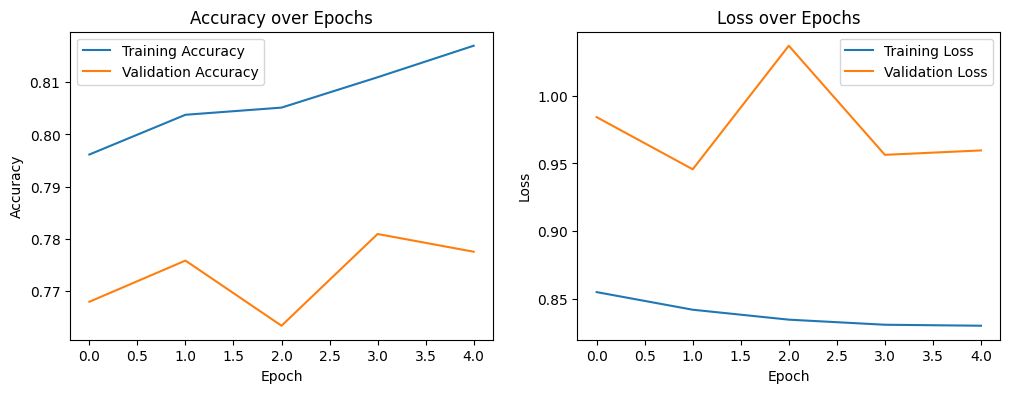

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Evaluate on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# prints and plots you might need to evaluate.

# result without regularization:
# 313/313 - 2s - loss: 1.3224 - accuracy: 0.7218 - 2s/epoch - 6ms/step

# result with dropout(0.2)
# 313/313 - 2s - loss: 0.7836 - accuracy: 0.7550 - 2s/epoch - 6ms/step

# result with l1 and l2 wegith regularization
# 313/313 - 2s - loss: 0.8709 - accuracy: 0.7635 - 2s/epoch - 6ms/step

# added another Conv layer, changed to increasing sizes
# 313/313 - 5s - loss: 0.9546 - accuracy: 0.7689 - 5s/epoch - 17ms/step

# did five more steps:
# 313/313 - 6s - loss: 0.9818 - accuracy: 0.7762 - 6s/epoch - 18ms/step

# did five more steps:
# 




313/313 - 6s - loss: 0.9818 - accuracy: 0.7762 - 6s/epoch - 18ms/step


# Excercise
Experiment with different architectures and try to find a model that performs well.